In [1]:
import pandas as pd , numpy as np , matplotlib.pyplot as plt,tensorflow as tf , matplotlib as mpl
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from tensorflow.keras.models import Model
import tensorflow.keras.layers as layers
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv',header=None).add_prefix('c')
df.head()

,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,...,c131,c132,c133,c134,c135,c136,c137,c138,c139,c140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


In [3]:
last_col = df.pop('c140')
df.insert(0,'target',last_col)

In [4]:
df['target'].value_counts()

target
1.0    2919
0.0    2079
Name: count, dtype: int64

In [5]:
df.describe()

,target,c0,c1,c2,c3,c4,c5,c6,c7,c8,...,c130,c131,c132,c133,c134,c135,c136,c137,c138,c139
count,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,...,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000
mean,0.584034,-0.262502,-1.649828,-2.492623,-3.119754,-3.167656,-2.866306,-2.272845,-1.797754,-1.409784,...,0.146633,0.071312,-0.062622,-0.276086,-0.507750,-0.761323,-0.835173,-0.642739,-0.487667,-0.706574
std,0.492937,1.152450,1.445542,1.386457,1.302921,1.104535,0.906312,0.731594,0.622794,0.636863,...,1.170839,1.404425,1.646105,1.894515,2.059366,2.086130,2.056296,1.859409,1.831088,1.414414
min,0.000000,-6.729499,-7.090374,-5.132459,-5.363241,-5.375715,-5.330194,-4.782240,-4.311288,-4.071361,...,-3.971715,-4.167040,-4.557576,-4.530488,-4.563270,-5.150100,-4.880460,-5.496107,-5.880890,-6.092227
25%,0.000000,-1.004220,-2.701936,-3.668585,-4.227337,-4.007630,-3.480666,-2.779832,-2.165808,-1.773870,...,-0.654403,-1.087720,-1.588237,-2.146835,-2.730750,-3.031224,-2.868603,-2.154560,-1.658289,-1.596809
50%,1.000000,-0.297541,-1.661892,-2.586129,-3.388210,-3.469899,-2.947061,-2.285427,-1.750084,-1.422457,...,0.473642,0.658318,0.717808,0.604747,0.334857,-0.030767,-0.195151,-0.194423,-0.160262,-0.568443
75%,1.000000,0.499909,-0.677998,-1.514187,-2.235690,-2.531153,-2.398797,-1.823480,-1.484107,-1.063592,...,1.061866,1.169392,1.238651,1.264379,1.234408,1.033957,0.945027,0.951621,1.002628,0.271635
max,1.000000,4.966414,3.479689,2.660597,1.899798,2.147015,1.614375,1.868728,1.804251,1.683730,...,2.960969,3.007606,2.854680,2.912394,2.937685,3.351437,3.432519,3.579448,4.425976,7.402103


In [6]:
train,test,y_train,y_test = tts(df.values , df.values[:,0],test_size = 0.2 ,random_state = 111)

In [7]:
scaler = MinMaxScaler()
scaler = scaler.fit(train)
train_sc = scaler.transform(train)
test_sc = scaler.transform(test)

In [8]:
normal_train_df = pd.DataFrame(train_sc).add_prefix('c').query('c0==1').values[:,1:]
anomly_train_df = pd.DataFrame(train_sc).add_prefix('c').query('c0==0').values[:,1:]

In [9]:
normal_test_df = pd.DataFrame(test_sc).add_prefix('c').query('c0==1').values[:,1:]
anomly_test_df = pd.DataFrame(test_sc).add_prefix('c').query('c0==0').values[:,1:]

In [10]:
print(normal_train_df.shape)
print(anomly_train_df.shape)

(2354, 140)
(1644, 140)


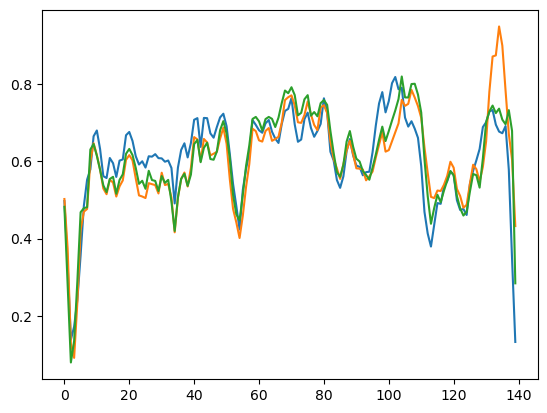

In [11]:
plt.plot(normal_train_df[0])
plt.plot(normal_train_df[1])
plt.plot(normal_train_df[2])

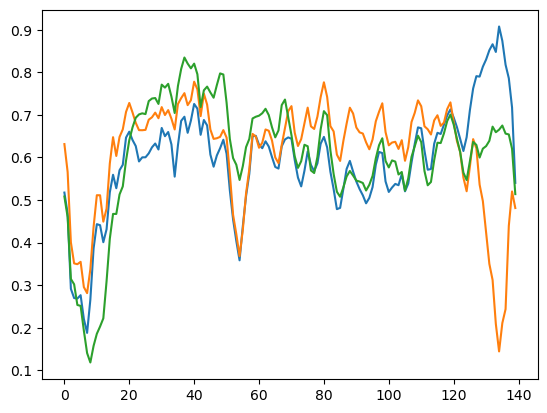

In [12]:
plt.plot(anomly_train_df[0])
plt.plot(anomly_train_df[1])
plt.plot(anomly_train_df[2])

In [13]:
import tensorflow.keras.layers as layers

class AnomalyDetector(Model):
  def __init__(self):
    super(AnomalyDetector, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Dense(64, activation="relu"),
      layers.Dense(32, activation="relu"),
      layers.Dense(16, activation="relu"),
      layers.Dense(8, activation="relu")])

    self.decoder = tf.keras.Sequential([
      layers.Dense(16, activation="relu"),
      layers.Dense(32, activation="relu"),
      layers.Dense(64, activation="relu"),
      layers.Dense(140, activation="sigmoid")])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded


model = AnomalyDetector()

In [14]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',patience = 2,mode= 'min')

model.compile(optimizer = 'adam',loss='mae')

In [15]:
history = model.fit(normal_train_df,normal_train_df,epochs = 100,batch_size = 128,validation_data = (train_sc[:,1:],train_sc[:,1:]),shuffle=True)

Epoch 1/100
19/19 [==============================] - 3s 28ms/step - loss: 0.1150 - val_loss: 0.0934
Epoch 2/100
19/19 [==============================] - 0s 11ms/step - loss: 0.0626 - val_loss: 0.0745
Epoch 3/100
19/19 [==============================] - 0s 12ms/step - loss: 0.0478 - val_loss: 0.0740
Epoch 4/100
19/19 [==============================] - 0s 12ms/step - loss: 0.0461 - val_loss: 0.0732
Epoch 5/100
19/19 [==============================] - 0s 11ms/step - loss: 0.0459 - val_loss: 0.0734
Epoch 6/100
19/19 [==============================] - 0s 11ms/step - loss: 0.0458 - val_loss: 0.0729
Epoch 7/100
19/19 [==============================] - 0s 11ms/step - loss: 0.0457 - val_loss: 0.0725
Epoch 8/100
19/19 [==============================] - 0s 12ms/step - loss: 0.0456 - val_loss: 0.0726
Epoch 9/100
19/19 [==============================] - 0s 11ms/step - loss: 0.0455 - val_loss: 0.0722
Epoch 10/100
19/19 [==============================] - 0s 12ms/step - loss: 0.0453 - val_loss: 0.0720

19/19 [==============================] - 0s 11ms/step - loss: 0.0249 - val_loss: 0.0471
Epoch 83/100
19/19 [==============================] - 0s 10ms/step - loss: 0.0248 - val_loss: 0.0465
Epoch 84/100
19/19 [==============================] - 0s 11ms/step - loss: 0.0248 - val_loss: 0.0468
Epoch 85/100
19/19 [==============================] - 0s 11ms/step - loss: 0.0248 - val_loss: 0.0464
Epoch 86/100
19/19 [==============================] - 0s 10ms/step - loss: 0.0248 - val_loss: 0.0468
Epoch 87/100
19/19 [==============================] - 0s 11ms/step - loss: 0.0248 - val_loss: 0.0465
Epoch 88/100
19/19 [==============================] - 0s 11ms/step - loss: 0.0248 - val_loss: 0.0474
Epoch 89/100
19/19 [==============================] - 0s 11ms/step - loss: 0.0249 - val_loss: 0.0470
Epoch 90/100
19/19 [==============================] - 0s 11ms/step - loss: 0.0247 - val_loss: 0.0470
Epoch 91/100
19/19 [==============================] - 0s 11ms/step - loss: 0.0246 - val_loss: 0.0469
Epo

In [16]:
encoder_out = model.encoder(normal_test_df).numpy()
decoder_out = model.decoder(encoder_out).numpy()

In [17]:
print(encoder_out.shape)
print(decoder_out.shape)

(565, 8)
(565, 140)


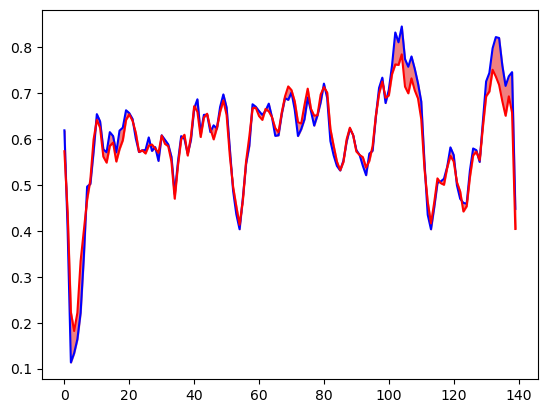

In [18]:
plt.plot(normal_test_df[0],'b')
plt.plot(decoder_out[0],'r')
plt.fill_between(np.arange(140),decoder_out[0],normal_test_df[0],color='lightcoral')
# plt.fill_between(np.arange(140), decoded_imgs[0], normal_test_data[0], color='lightcoral' )

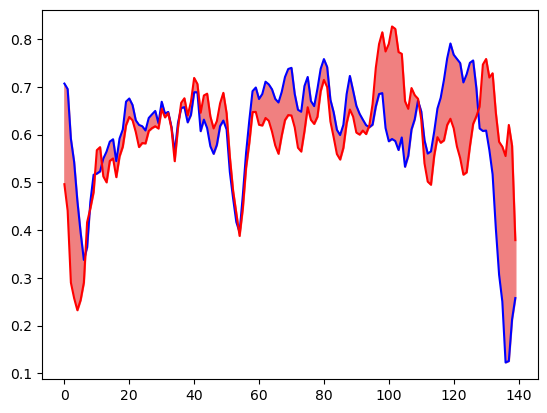

In [19]:
encoder_out_a = model.encoder(anomly_test_df).numpy()
decoder_out_a = model.decoder(encoder_out_a).numpy()

plt.plot(anomly_test_df[0],'b')
plt.plot(decoder_out_a[0],'r')
plt.fill_between(np.arange(140),decoder_out_a[0],anomly_test_df[0],color = 'lightcoral')

18/18 [==============================] - 0s 4ms/step


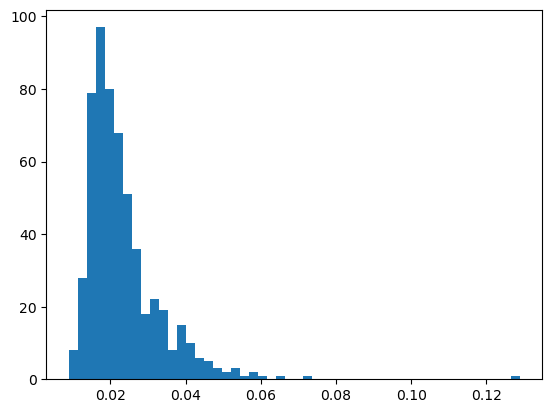

In [20]:
reconstruction= model.predict(normal_test_df)
train_loss  = tf.keras.losses.mae(reconstruction,normal_test_df)

plt.hist(train_loss,bins = 50)
plt.show()

In [21]:
print(np.mean(train_loss))
print(np.std(train_loss))

0.023323423693071763
0.010221997229280478


In [22]:
threshold = np.mean(train_loss)+2*np.std(train_loss)
threshold

0.04376741815163272

14/14 [==============================] - 0s 3ms/step


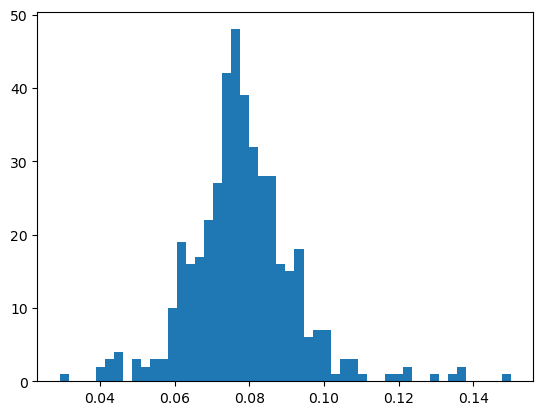

In [23]:
reconstruction_a = model.predict(anomly_test_df)
train_loss_a = tf.keras.losses.mae(reconstruction_a,anomly_test_df)

plt.hist(train_loss_a,bins=50)
plt.show()

In [24]:
print(np.mean(train_loss_a))
print(np.std(train_loss_a))

0.07826916427601009
0.014280308504062308


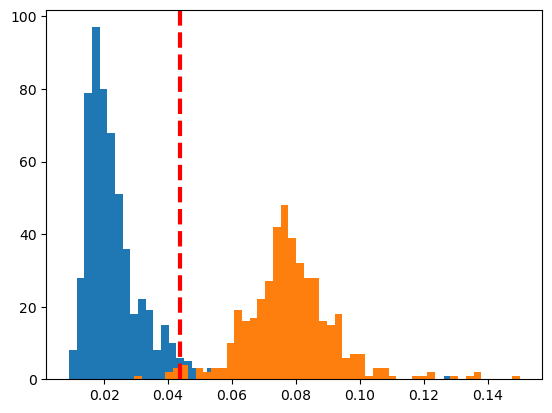

In [25]:
plt.hist(train_loss,bins=50,label='normal')
plt.hist(train_loss_a,bins=50,label='anomly')
plt.axvline(threshold , color='r',linewidth=3,linestyle = 'dashed',label = '{:03f}'.format(threshold))
plt.show()

In [26]:
tf.math.less(train_loss,threshold)

<tf.Tensor: shape=(565,), dtype=bool, numpy=
array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  Tr

In [27]:
pred = tf.math.less(train_loss,threshold)
tf.math.count_nonzero(pred)

<tf.Tensor: shape=(), dtype=int64, numpy=542>

In [28]:
pred.shape

TensorShape([565])

In [29]:
# for noraml use tf.math.less , for anomly use tf.math.greater than threshold
pred_a = tf.math.greater(train_loss_a,threshold)
tf.math.count_nonzero(pred_a)

<tf.Tensor: shape=(), dtype=int64, numpy=429>

In [30]:
pred_a.shape

TensorShape([435])

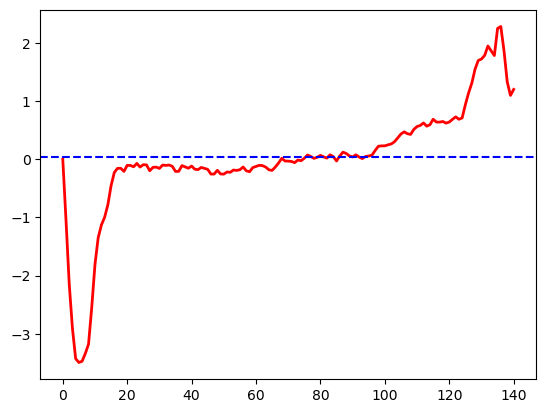

In [31]:
plt.plot(train[0],color = 'r',linewidth = 2)
plt.axhline(threshold,color = 'b',linewidth = 1.5,linestyle = '--')